`Objective
`
To predict whether a patient has diabetes (Outcome) based on their health metrics, such as number of pregnancies, glucose level, blood pressure, BMI, insulin level, age, and skin thickness, using logistic regression.

In [406]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [407]:
#import csv file
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


`Data Preprocessing`

In [408]:
#check the null values hanldr if any exist
data.isnull().sum()

#no mmissing values
#and there is no inconsistencies in the data as well so we now handle the outliers

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [409]:
data.describe() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [410]:
# Let's say your dataframe is df
Q1 = data.drop(columns=['Outcome']).quantile(0.25)   # 25th percentile
Q3 = data.drop(columns=['Outcome']).quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                                      # Interquartile range

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows: keep only those within bounds for all numeric columns except 'Outcome'
df_clean = data[~((data.drop(columns=['Outcome']) < lower_bound) | 
                (data.drop(columns=['Outcome']) > upper_bound)).any(axis=1)]

print("Original shape:", data.shape)
print("After outlier removal:", df_clean.shape)



Original shape: (768, 9)
After outlier removal: (639, 9)


In [411]:
df_clean.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,639.000000,639.000000,639.000000,639.000000,639.000000,639.00000,639.000000,639.000000,639.000000
mean,3.804382,119.112676,72.120501,20.563380,65.931142,32.00579,0.429177,32.715180,0.312989
std,3.260995,29.162175,11.348686,15.339991,79.569482,6.43397,0.250957,11.080651,0.464073
min,0.000000,44.000000,38.000000,0.000000,0.000000,18.20000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.30000,0.242000,24.000000,0.000000
50%,3.000000,114.000000,72.000000,23.000000,37.000000,32.00000,0.358000,29.000000,0.000000
75%,6.000000,137.000000,80.000000,32.000000,120.000000,35.95000,0.586000,40.000000,1.000000
max,13.000000,198.000000,106.000000,60.000000,318.000000,50.00000,1.191000,66.000000,1.000000


In [412]:
from sklearn.preprocessing import  RobustScaler

# Separate features and target
X = df_clean.drop(columns=['Outcome'])
y = df_clean['Outcome']

# Apply MinMaxScaler
scaler = RobustScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Combine back with Outcome
df_scaled = pd.concat([X_scaled, y.reset_index(drop=True)], axis=1)

print(df_scaled.head())


   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0          0.6  0.894737          0.000        0.37500 -0.308333  0.184971   
1         -0.4 -0.763158         -0.375        0.18750 -0.308333 -0.624277   
2          1.0  1.815789         -0.500       -0.71875 -0.308333 -1.005780   
3         -0.4 -0.657895         -0.375        0.00000  0.475000 -0.450867   
4          0.4  0.052632          0.125       -0.71875 -0.308333 -0.739884   

   DiabetesPedigreeFunction     Age  Outcome  
0                  0.781977  1.3125        1  
1                 -0.020349  0.1250        0  
2                  0.912791  0.1875        1  
3                 -0.555233 -0.5000        0  
4                 -0.456395  0.0625        0  


Outcome                     1.000000
Glucose                     0.492740
BMI                         0.269371
Age                         0.263344
Pregnancies                 0.227987
BloodPressure               0.183298
DiabetesPedigreeFunction    0.179072
Insulin                     0.097746
SkinThickness               0.030676
Name: Outcome, dtype: float64


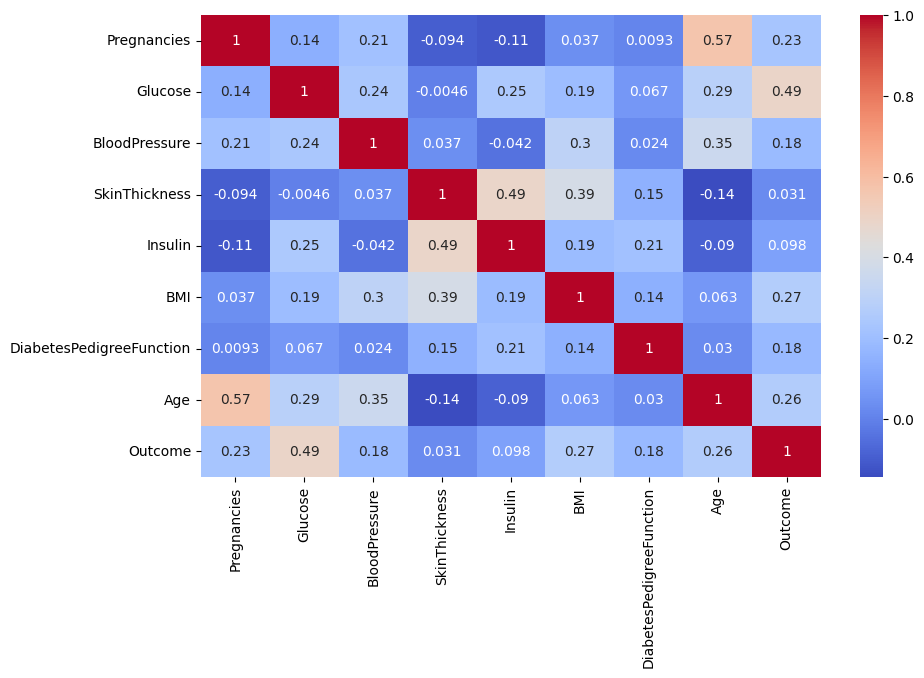

In [413]:
corr = df_scaled.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")

print(corr["Outcome"].sort_values(ascending=False))

In [414]:
#import the package from the sklearn for the model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [415]:

X = df_scaled.drop(columns=['Outcome'])
y = df_scaled['Outcome']

In [416]:
train_X, test_X, train_Y, test_Y = train_test_split(X, y, test_size = 0.2, random_state=42)

In [417]:
model = LogisticRegression(max_iter=1000)

In [418]:
model.fit(train_X, train_Y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [419]:
y_pred = model.predict(test_X)
y_pred

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [420]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [421]:
# 📊 Evaluate performance
print("Accuracy:", accuracy_score(test_Y, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(test_Y, y_pred))
print("\nClassification Report:\n", classification_report(test_Y, y_pred))

Accuracy: 0.828125

Confusion Matrix:
 [[88  4]
 [18 18]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89        92
           1       0.82      0.50      0.62        36

    accuracy                           0.83       128
   macro avg       0.82      0.73      0.75       128
weighted avg       0.83      0.83      0.81       128



In [422]:
#Now lets save this model
import joblib

joblib.dump(model, "/Users/apple/Desktop/Machine-Learning/saved-models/diabetes_check_classification_model.pkl")


['/Users/apple/Desktop/Machine-Learning/saved-models/diabetes_check_classification_model.pkl']